In [311]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing
from sklearn.metrics import r2_score
import math

In [312]:
data = pd.read_csv('A-train.csv')
data

,x1,x2,x3,x4,x5,x6,x7,x8,y
0,26.52,89.93,-60.46,1137.04,-3.49,NaN,-5.88,-17.13,7.44
1,-68.18,-127.21,23.30,1471.49,16.95,2.30,-11.51,-7.70,7.31
2,-95.05,36.10,-75.27,1158.04,6.97,3.21,-5.86,8.65,-5.77
3,124.40,-8.19,NaN,5527.92,7.36,7.23,10.77,1.92,-0.42
4,-103.25,NaN,-2.89,4865.06,-5.21,-1.54,NaN,4.69,4.31
...,...,...,...,...,...,...,...,...,...
185,34.29,-38.65,-44.41,9775.28,-3.43,4.95,4.60,-11.73,11.78
186,1.62,145.02,53.26,4546.80,11.81,-4.31,4.86,-0.42,3.79
187,29.46,33.91,-20.96,6083819.57,5.10,2.93,1.23,3.23,-3.17
188,-64.93,25.39,-118.74,1746.40,226.26,-1.91,-16.11,-10.44,0.97


In [313]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 190 entries, 0 to 189
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      181 non-null    float64
 1   x2      180 non-null    float64
 2   x3      180 non-null    float64
 3   x4      181 non-null    float64
 4   x5      180 non-null    float64
 5   x6      180 non-null    float64
 6   x7      180 non-null    float64
 7   x8      181 non-null    float64
 8   y       188 non-null    float64
dtypes: float64(9)
memory usage: 13.5 KB


In [314]:
X = data[["x1","x2","x3","x4","x5","x6","x7","x8"]]
Y = data[["y"]]

In [315]:
column = ['x1','x2','x3','x4','x5','x6','x7','x8','y']
for i in column:
    data[i].fillna(data[i].mean(),inplace=True)

In [316]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 190 entries, 0 to 189
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      190 non-null    float64
 1   x2      190 non-null    float64
 2   x3      190 non-null    float64
 3   x4      190 non-null    float64
 4   x5      190 non-null    float64
 5   x6      190 non-null    float64
 6   x7      190 non-null    float64
 7   x8      190 non-null    float64
 8   y       190 non-null    float64
dtypes: float64(9)
memory usage: 13.5 KB


In [317]:
column = ['x1','x2','x3','x4','x5','x6','x7','x8']
for i in column:
    low = data[i].quantile(0.1)
    high = data[i].quantile(0.9)
    for j in range(len(data)):
        if(data[i][j] < low ):
            data[i][j] = low
        elif(data[i][j] > high ):
            data[i][j] = high
        inplace=True



In [318]:
data

,x1,x2,x3,x4,x5,x6,x7,x8,y
0,26.52,89.930000,-60.460000,1137.040,-3.490,1.386444,-5.880000,-13.959,7.44
1,-68.18,-127.210000,23.300000,1471.490,12.651,2.300000,-11.168000,-7.700,7.31
2,-95.05,36.100000,-75.270000,1158.040,6.970,3.210000,-5.860000,8.650,-5.77
3,124.40,-8.190000,2.463778,5527.920,7.360,7.230000,10.770000,1.920,-0.42
4,-103.25,6.777722,-2.890000,4865.060,-5.210,-1.540000,-0.243444,4.690,4.31
...,...,...,...,...,...,...,...,...,...
185,34.29,-38.650000,-44.410000,9775.280,-3.430,4.950000,4.600000,-11.730,11.78
186,1.62,133.154000,53.260000,4546.800,11.810,-4.310000,4.860000,-0.420,3.79
187,29.46,33.910000,-20.960000,46918.593,5.100,2.930000,1.230000,3.230,-3.17
188,-64.93,25.390000,-105.113000,1746.400,12.651,-1.910000,-11.168000,-10.440,0.97


In [319]:
X = data[["x1","x2","x3","x4","x5","x6","x7","x8"]]
Y = data[["y"]]

<AxesSubplot:>

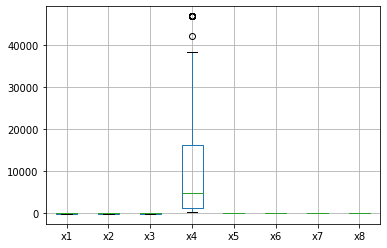

In [320]:
X.boxplot()

In [321]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=101)
print("len(X_train) : ", len(X_train))
print("len(X_test) : ", len(X_test))
print("len(y_train) : ", len(y_train))
print("len(y_test) : ", len(y_test))

len(X_train) :  152
len(X_test) :  38
len(y_train) :  152
len(y_test) :  38


In [322]:
lm = LinearRegression()
lm.fit(X_train,y_train)
y_pred = lm.predict(X_test)

In [323]:
m = lm.coef_
c = lm.intercept_

MSE = np.square(np.subtract(y_test,y_pred)).mean()
RMSE = math.sqrt(MSE) 
print("RMSE =" ,RMSE)
print('r^2 = ',r2_score(y_test, y_pred))

RMSE = 5.566974937556753
r^2 =  0.6620023930696519
